<div align="center">
<a href="https://vbti.nl"><img src="https://docs.google.com/uc?export=download&id=1DdCGllL51O5wBuiI0rwygofKx3YIDPHX" width="400"></a>
</div>

# Recurrent Neural Networks

In this notebook we will explore Recurrent Neural Networks. 

*Learning objective*

- Learn the ins-and-outs of Simple RNN cells.
- Learn how to use RNNs for system identification.
- Train a model for time series forecasting.


## Introduction SimpleRNN
This section explores the most basic recurrent neural network cell in the keras framework: the SimpleRNN cell. 
Although it is a simple model, a lot of confusion arises from the dimensionalities of the different variables. Therefore we will explore these in detail in this section.

A SimpleRNN is defined by the following equation:

$$
h_{t} = f(W_x^Tx_t + W_h^Th_{t-1}+b)
$$

$$
y_t = h_t
$$

with input $x$, hidden state $h$ and output $y$. Notice that these variables can be vectors (have dimensionality > 1).

This model has three sets of parameters that need to be learned:

- the input matrix $W_x$, 
- the feedback matrix $W_y$, and 
- the bias $b$.

In the next section the meaning of these parameters is investigated.


## Building a single SimpleRNN model

In this section the simplest recurrent neural network is created. It consists of a single SimpleRNN cell, with one dimensional input and output. The activation function will be linear.

In [1]:
# import some default libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.__version__

'2.1.0'

Just like ANNs and CNNs, RNNs in keras can be created using a `Sequential` model and adding various layers, such as the `SimpleRNN` layer. Below a simple RNN is made.

In [2]:
# dimension of input
input_dim = 1

# dimenstion of output
output_dim = 1

# create RNN model
model  = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(output_dim, 
                              input_shape=[None, input_dim],
                              activation='linear'
                             )
])

In [3]:
# plot model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


As expected, there are 3 parameters in this model. We will check their values below.

In [4]:
# plot number of layers
print(f"This model has {len(model.layers)} layers.")

This model has 1 layers.


In [5]:
# print weights of the layer
print("Parameters SimpleRNN layer:\n")
print(f"Wh = {model.layers[0].get_weights()[1]}")
print(f"Wx = {model.layers[0].get_weights()[0]}")
print(f"b  = {model.layers[0].get_weights()[2]}")

Parameters SimpleRNN layer:

Wh = [[1.]]
Wx = [[-0.84286076]]
b  = [0.]


As the input and output dimensions are 1 there are only 3 scalar values. They have been initialized with a random value.

To make a prediction an input array needs to be defined. This input array should have the following shape: `(batch_size, time_steps, input_dim)`. The prediction (output) is an array with dimensions `(batch_size, output_dim)`.

In [6]:
# number of samples that are part of an input series
time_steps = 15

# batch size
batch_size = 1

# create input array with proper dimensions and initialized to 0
X = np.zeros(shape=(batch_size, time_steps, input_dim))

In [7]:
# calculate prediction [batch_size, output_dim]
Y = model.predict(X)
Y.shape, Y

((1, 1), array([[0.]], dtype=float32))

By default, a RNN in keras will return only the final output when applying a time series as input. When you need to return the output for every sample of the time series, you must set `return_sequences=True` when defining a layer. This is illustrated below.

In [8]:
# create RNN model that returns output at every timestep
model  = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(output_dim, 
                              input_shape=[None, input_dim],
                              activation='linear',
                              return_sequences=True
                             )
])

In [9]:
# calculate prediction [batch_size, output_dim]
Y = model.predict(X)
print(Y.shape, Y)

(1, 15, 1) [[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]]


As the input `X` is zero, the output `Y` is also zero. But notice the shape of the vectors!

Let's simulate over several time steps now. First a plot function for time series is defined. Next a random input sequence is generated and the output of the RNN is calculated and plotted.

In [10]:
def plot_timeseries(timeseries_data, labels):
    # plot timeseries. 
    #
    # Arguments:
    # timeseries_data : list of arrays with plot data
    # labels : list of titles for every plot data item
    
    # create subplots
    n_plots = len(timeseries_data)
    fig, axs = plt.subplots(n_plots, 1, figsize=(12, 2 * n_plots))
    
    # plot data
    for i, (series, label) in enumerate(zip(timeseries_data, labels)):
        axs[i].plot(series, marker='o')
        axs[i].set_title(label)
    plt.tight_layout()

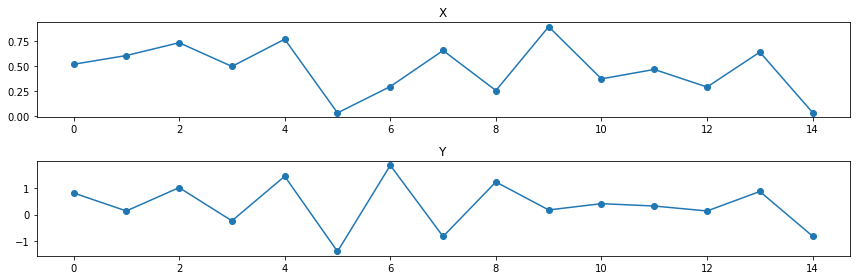

In [11]:
# generate random input
X[0,:,0] = np.random.random(time_steps)

# calculate prediction 
Y = model.predict(X)

# plot timeseries
plot_timeseries([X[0,:,0], Y[0,:,0]], ['X', 'Y'])

By setting the weights of our model manually, we can investigate its working in a little more details. This is illustrated below.

In [12]:
# set weights of the layer
Wx = np.zeros(shape=(input_dim, output_dim))
Wy = np.zeros(shape=(output_dim, output_dim))
b = np.zeros(shape=(output_dim))

Wx[0,0] = 0.5
Wy[0,0] = 0.0
b[0] = 0.0

model.layers[0].set_weights([Wx, Wy, b])

# print weights of the layer
print("Parameters SimpleRNN layer:\n")
print(f"Wh = {model.layers[0].get_weights()[1]}")
print(f"Wx = {model.layers[0].get_weights()[0]}")
print(f"b  = {model.layers[0].get_weights()[2]}")

Parameters SimpleRNN layer:

Wh = [[0.]]
Wx = [[0.5]]
b  = [0.]


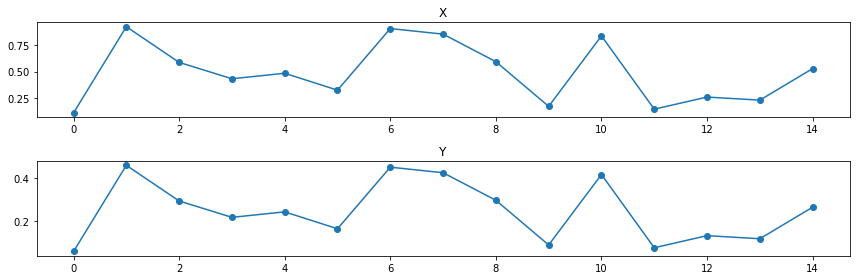

In [13]:
# generate random input
X[0,:,0] = np.random.random(time_steps)

# calculate prediction 
Y = model.predict(X)

# plot timeseries
plot_timeseries([X[0,:,0], Y[0,:,0]], ['X', 'Y'])

By setting $W_x=0.5$ and all the other parameters to zero, the simple rnn cell just multiplies the input with 0.5. This can be seen from the graph above.

## Example: linear dynamic system identification

In this example, a simple RNN is trained to mimic a mechanical mass-spring-damper system. Such a system can be modeled by a second-order (discrete-time) difference equation in matrix form:

$$
\dot{x} = Ax + Bu
$$
$$
y = Cx
$$

where x is a two-dimensional vector (position, velocity). When we replace $x$ by $h$ and $u$ by $x$ the equation equals a simple recurrent neural network cell with a linear activation function.

To generate training data a simulation model of the dynamic model of the system is needed. This is implemented below.

In [14]:
class DynamicSystem:
    """Abstract class for discrete time system simulation."""
    def __init__(self, X0):
        self.X0 = X0.copy()
        
    def reset(self):
        self.X = self.X0.copy()
        
    def step(self, U):
        pass
    
    
class MassSpringDamper(DynamicSystem):
    """Simulate mass-spring-damper system with Euler integration."""
    def __init__(self, mass, damping, spring_constant, X0, dT=0.01, n_oversample=100, scale_input=0.01):
        super().__init__(X0)
        self.m = mass
        self.d = damping
        self.k = spring_constant
        self.dT = (dT/n_oversample)
        self.n_oversample = n_oversample
        self.scale_input = scale_input
        
        self.A = np.array([[1, self.dT], [-self.k*self.dT/self.m, 1-self.d*self.dT/self.m]])
        self.B = np.array([0, self.dT*self.scale_input/self.m])
        self.C = np.array([1, 0])
                
    def reset(self):
        super().reset()
        self.observation = self.X[0]
            
    def step(self, u):
        # oversampling is needed to get higher accuracy with the Euler integration
        for _ in range(self.n_oversample):
            X_next = np.matmul(self.A, self.X) + self.B * u
            self.X = X_next
        self.observation = np.dot(self.C, self.X)

To generate training data a support function is created that generates a single response from the dynamic system that acts as a single time series.

In [15]:
def generate_dynamic_system_time_series(model, n_timesteps, mode='random_input'):
    # generate system input - output timeseries
    model.reset()

    # generate input force on mass
    if mode=='random_input':
        u = 2.0 * (-0.5 + np.random.random(n_timesteps))
    elif mode=='random_step':
        u = 2.0 * (-0.5 + np.random.random()) * np.ones(n_timesteps)
    elif mode=='unit_step':
        u = np.ones(n_timesteps)
        
    # simulate system
    y = np.zeros(n_timesteps)
    for t in range(n_timesteps):
        model.step(u[t])
        y[t] = model.observation
        
    return u, y

Let's generate a single time series and plot it.

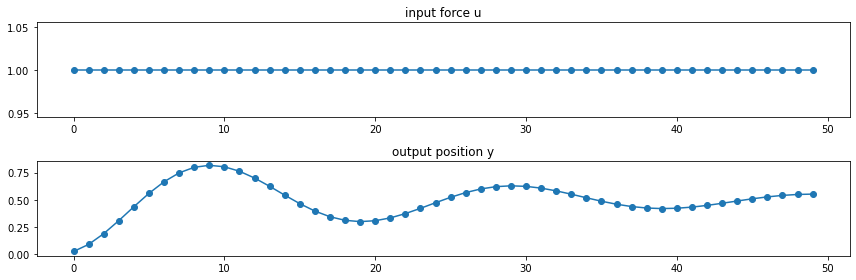

In [16]:
dynsys = MassSpringDamper(mass=0.2, 
                          damping=0.02, 
                          spring_constant=0.02, 
                          X0=np.array([0.0, 0.0]), 
                          dT=1.0,
                          n_oversample=10)

u, y = generate_dynamic_system_time_series(dynsys, 
                                           n_timesteps=50,
                                           mode='unit_step')
    
# plot timeseries
plot_timeseries([u, y], ['input force u', 'output position y'])

Next step is to generate a training dataset. The input tensor should have the shape `(batch_size, time_steps, input_dim)` and the output shape should be `(batch_size, time_steps, output_dim)`.

In [17]:
# number of samples that are part of an input series
time_steps = 15

# batch size
train_batch_size = 5_000
test_batch_size = 100

# define input dimension
input_dim = 1

#define output dimension
output_dim = 1

# create input array with proper dimensions
X_train = np.zeros(shape=(train_batch_size, time_steps, input_dim))
y_train = np.zeros(shape=(train_batch_size, time_steps, output_dim))

X_test = np.zeros(shape=(test_batch_size, time_steps, input_dim))
y_test = np.zeros(shape=(test_batch_size, time_steps, output_dim))

for b in range(train_batch_size):
    u, y = generate_dynamic_system_time_series(dynsys, 
                                               n_timesteps=time_steps, 
                                               mode='random_input')
    X_train[b,:,0] = u
    y_train[b,:,0] = y
    
for b in range(test_batch_size):
    u, y = generate_dynamic_system_time_series(dynsys, 
                                               n_timesteps=time_steps, 
                                               mode='random_input')
    X_test[b,:,0] = u
    y_test[b,:,0] = y

Let's plot a single training sample from our batch.

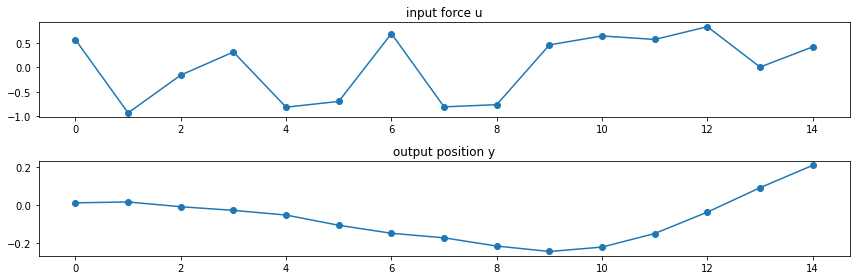

In [18]:
plot_timeseries([X_train[0,:,0], y_train[0,:,0]], ['input force u', 'output position y'])

With the training and test data ready we can start building an RNN model. Our model consists of two layers. The first layer is a keras `SimpleRNN` layer. By default, this layer only outputs the last values of a time series. Because we will train the model for every timestep, the `SimpleRNN` needs to return a time-series. To apply the output of this time series to the second `Dense` layer in the model, the `TimeDistributed` layer is needed.

In [19]:
hidden_state_dim = 2

model  = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(hidden_state_dim, 
                              input_shape=[None, input_dim],
                              activation='linear',
                              return_sequences=True,
                              use_bias=False),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Dense(output_dim, 
                              activation='linear',
                              use_bias=False)
    )    
])

optimizer = tf.keras.optimizers.Adam(lr=0.01)
#optimizer = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

In [20]:
# print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 2)           6         
_________________________________________________________________
time_distributed (TimeDistri (None, None, 1)           2         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [21]:
# train model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=2)

Train on 5000 samples, validate on 100 samples
Epoch 1/50
5000/5000 - 1s - loss: 0.3254 - mse: 0.3254 - val_loss: 0.0355 - val_mse: 0.0355
Epoch 2/50
5000/5000 - 0s - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0181 - val_mse: 0.0181
Epoch 3/50
5000/5000 - 0s - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 4/50
5000/5000 - 0s - loss: 0.0171 - mse: 0.0171 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 5/50
5000/5000 - 0s - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 6/50
5000/5000 - 0s - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 7/50
5000/5000 - 0s - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 8/50
5000/5000 - 0s - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 9/50
5000/5000 - 0s - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 10/50
5000/5000 - 0s - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0060 - val_mse: 0.0060
Epoch 11/50
5000/5000 - 0s - los

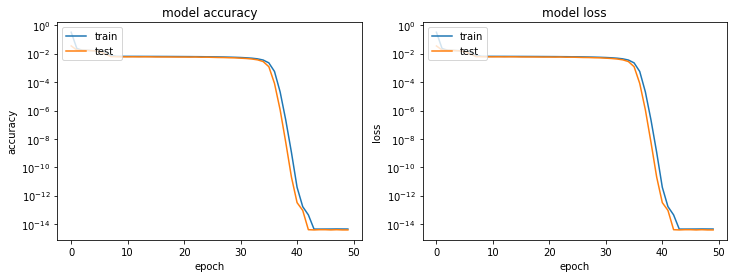

In [22]:
def plot_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # summarize history for accuracy
    axs[0].plot(history.history['mse'])
    axs[0].plot(history.history['val_mse'])
    axs[0].set_yscale('log')
    axs[0].set_title('model accuracy')
    axs[0].set_ylabel('accuracy')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    axs[1].plot(history.history['loss'])
    axs[1].plot(history.history['val_loss'])
    axs[1].set_yscale('log')
    axs[1].set_title('model loss')
    axs[1].set_ylabel('loss')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'test'], loc='upper left');
    
plot_history(history)

To see what the model has learned we compare the parameters of the dynamic model with the found values of the RNN model.

In [23]:
print("Parameters dynamic system model:\n")
print(f"A (Wh^T) = {dynsys.A}")
print(f"B (Wx)   = {dynsys.B}")
print(f"C (W)    = {dynsys.C}\n\n")

print("Parameters SimpleRNN layer:\n")
print(f"Wh^T = {np.transpose(model.layers[0].get_weights()[1])}")
print(f"Wx   = {model.layers[0].get_weights()[0]}")
#print(f"b    = {model.layers[0].get_weights()[2]}")

print("\nParameters Dense layer:\n")
print(f"W    = {model.layers[1].get_weights()[0]}")
#print(f"b    = {model.layers[1].get_weights()[1]}")

Parameters dynamic system model:

A (Wh^T) = [[ 1.    0.1 ]
 [-0.01  0.99]]
B (Wx)   = [0.    0.005]
C (W)    = [1 0]


Parameters SimpleRNN layer:

Wh^T = [[ 1.9086918   1.0627791 ]
 [-1.0219214  -0.09038544]]
Wx   = [[-0.4228314   0.53871626]]

Parameters Dense layer:

W    = [[0.7521166]
 [0.6308079]]


### Question

Should the RNN learn the identical parameters as those of the dynamic model?

To compare whether the original dynamic model is the same as the learned model, we will compare the response to a step function for both.

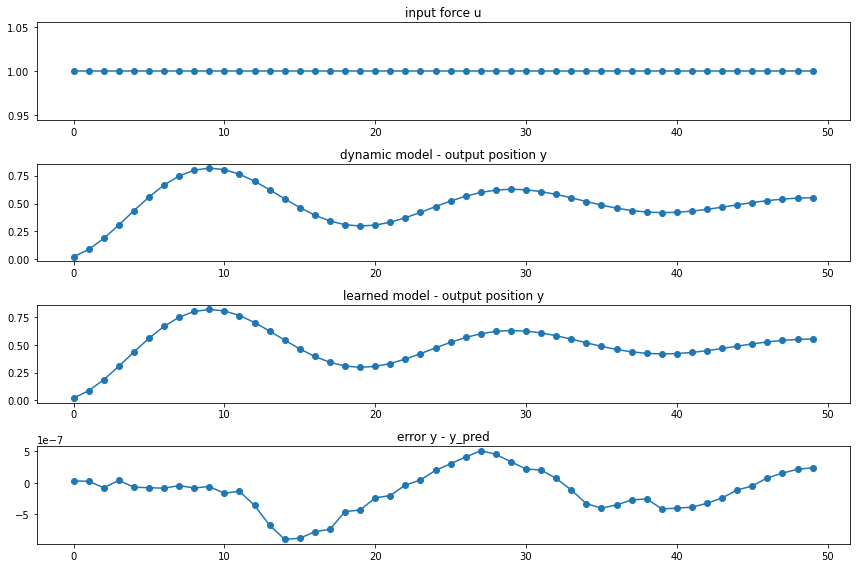

In [24]:
# simulate dynamic system
u, y = generate_dynamic_system_time_series(dynsys, 
                                           n_timesteps=50,
                                           mode='unit_step')
# prediction
y_pred = model.predict(u[np.newaxis,...,np.newaxis])

plot_timeseries([u, y, y_pred[0,:,0], y-y_pred[0,:,0]], 
                ['input force u', 
                 'dynamic model - output position y', 
                 'learned model - output position y',
                 'error y - y_pred'])

## Example: non-linear dynamic system identification

In this section we extend the previous example by making the system nonlinear. We replace the linear spring by a non-linear spring:

$$
F_{spring} = k_1 * x + k_2 * x^3
$$

In [25]:
class NonlinearMassSpringDamper(DynamicSystem):
    """Simulate mass-spring-damper system with Euler integration."""
    def __init__(self, mass, damping, spring_constant, X0, dT=0.01, n_oversample=100, scale_input=0.01):
        super().__init__(X0)
        self.m = mass
        self.d = damping
        self.k = spring_constant[0]
        self.kp = spring_constant[1]        
        self.dT = dT
        self.n_oversample = n_oversample
        self.scale_input = scale_input
        
    def reset(self):
        super().reset()
        self.observation = self.X[0]
            
    def step(self, u):
        # update x
        for _ in range(self.n_oversample):
            x, dx = self.X[0], self.X[1]
            ddx = (self.scale_input*u - self.k * x - self.kp * x**3 - self.d * dx) / self.m        
            self.X[0] = x + dx * (self.dT / self.n_oversample)
            self.X[1] = dx + ddx * (self.dT / self.n_oversample)
        self.observation = self.X[0]

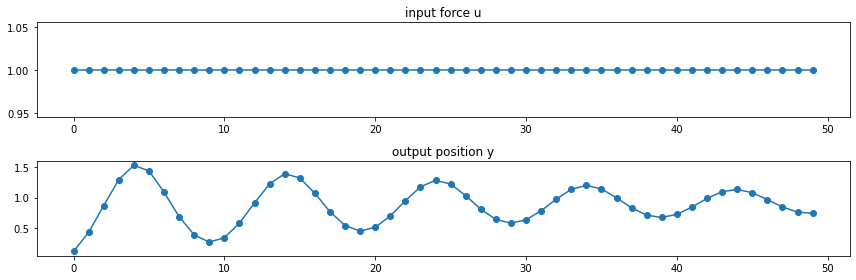

In [26]:
nl_dynsys = NonlinearMassSpringDamper(mass=0.2, 
                                      damping=0.02, 
                                      spring_constant=[0.02*2, 0.002*8], 
                                      X0=np.array([0.0, 0.0]), 
                                      dT=1.0,
                                      n_oversample=10,
                                      scale_input=0.05)

u, y = generate_dynamic_system_time_series(nl_dynsys, 
                                           n_timesteps=50,
                                           mode='unit_step')
    
# plot timeseries
plot_timeseries([u, y], ['input force u', 'output position y'])

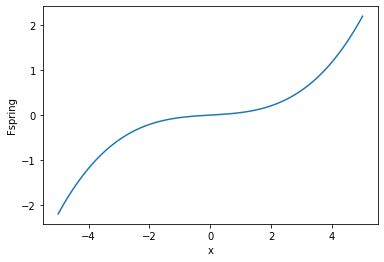

In [27]:
# plot non-linear spring function
x_ = np.linspace(-5,5,100)
plt.plot(x_, nl_dynsys.k*x_ + nl_dynsys.kp*x_**3)
plt.xlabel('x')
plt.ylabel('Fspring');

We will generate again a trainingset and create a new model to learning the non-linear dynamics of our system.

In [28]:
# number of samples that are part of an input series
time_steps = 50

# batch size
train_batch_size = 5_000
test_batch_size = 100

# define input dimension
input_dim = 1

#define output dimension
output_dim = 1

# create input array with proper dimensions
X_train = np.zeros(shape=(train_batch_size, time_steps, input_dim))
y_train = np.zeros(shape=(train_batch_size, time_steps, output_dim))

X_test = np.zeros(shape=(test_batch_size, time_steps, input_dim))
y_test = np.zeros(shape=(test_batch_size, time_steps, output_dim))

for b in range(train_batch_size):
    u, y = generate_dynamic_system_time_series(nl_dynsys, 
                                               n_timesteps=time_steps, 
                                               mode='random_step')
    X_train[b,:,0] = u
    y_train[b,:,0] = y
    
for b in range(test_batch_size):
    u, y = generate_dynamic_system_time_series(nl_dynsys, 
                                               n_timesteps=time_steps, 
                                               mode='random_step')
    X_test[b,:,0] = u
    y_test[b,:,0] = y

In [29]:
import tensorflow.keras.backend as K

class MLPRNN(tf.keras.layers.Layer):

    def __init__(self, state_size, hidden_units, activation="linear", **kwargs):
        self.state_size = state_size
        self.hidden_units = hidden_units
        self.activation = tf.keras.activations.get(activation)
        super(MLPRNN, self).__init__(**kwargs)

    def build(self, input_shape):
        # input kernel
        self.Wx = self.add_weight(
            shape=(input_shape[-1], self.hidden_units),
            initializer='he_normal',
            name='Wx')
        
        # hidden_state kernel
        self.Wh = self.add_weight(
            shape=(self.state_size, self.hidden_units),
            initializer='he_normal',
            name='Wh')
        
        # hidden_state kernel
        self.bh = self.add_weight(
            shape=(1, self.hidden_units),
            initializer='zero',
            name='bh')        
        
        # output kernel
        self.Wo = self.add_weight(
            shape=(self.hidden_units, self.state_size),
            initializer='he_normal',
            name='Wo')

        # hidden_state kernel
        self.bo = self.add_weight(
            shape=(1, self.state_size),
            initializer='zero',
            name='bh')                
        
        self.built = True


    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.Wx)
        hidden = self.activation(h + K.dot(prev_output, self.Wh) + self.bh)
        output = K.dot(hidden, self.Wo) + self.bo
        return output, [output]

In [36]:
state_size = 2
hidden_units = 11

model  = tf.keras.models.Sequential([
            tf.keras.layers.RNN(
                MLPRNN(state_size=state_size,
                       hidden_units=hidden_units, 
                       activation="tanh",
                       input_shape=[None, input_dim]),
                return_sequences=True),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Dense(output_dim, activation='linear')
    )    
])

optimizer = tf.keras.optimizers.Adam(lr=0.001)
#optimizer = tf.keras.optimizers.SGD(lr=0.01)
model.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

In [37]:
# train model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=2)

Train on 5000 samples, validate on 100 samples
Epoch 1/100
5000/5000 - 2s - loss: 3.8117 - mse: 3.8117 - val_loss: 0.2177 - val_mse: 0.2177
Epoch 2/100
5000/5000 - 1s - loss: 0.1036 - mse: 0.1036 - val_loss: 0.0778 - val_mse: 0.0778
Epoch 3/100
5000/5000 - 1s - loss: 0.0659 - mse: 0.0659 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 4/100
5000/5000 - 1s - loss: 0.0550 - mse: 0.0550 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 5/100
5000/5000 - 1s - loss: 0.0493 - mse: 0.0493 - val_loss: 0.0486 - val_mse: 0.0486
Epoch 6/100
5000/5000 - 1s - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0459 - val_mse: 0.0459
Epoch 7/100
5000/5000 - 1s - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0442 - val_mse: 0.0442
Epoch 8/100
5000/5000 - 1s - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0430 - val_mse: 0.0430
Epoch 9/100
5000/5000 - 1s - loss: 0.0409 - mse: 0.0409 - val_loss: 0.0424 - val_mse: 0.0424
Epoch 10/100
5000/5000 - 1s - loss: 0.0404 - mse: 0.0404 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 11/100
5000/5000

Epoch 88/100
5000/5000 - 1s - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 89/100
5000/5000 - 1s - loss: 0.0019 - mse: 0.0019 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 90/100
5000/5000 - 1s - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 91/100
5000/5000 - 1s - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 92/100
5000/5000 - 1s - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 93/100
5000/5000 - 1s - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 94/100
5000/5000 - 1s - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 95/100
5000/5000 - 1s - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 96/100
5000/5000 - 1s - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 97/100
5000/5000 - 1s - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 98/100
5000/5000 - 1s - loss: 0.0016 - mse: 0.0016 - v

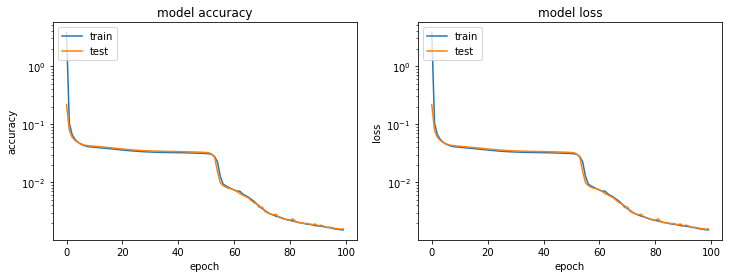

In [38]:
plot_history(history)

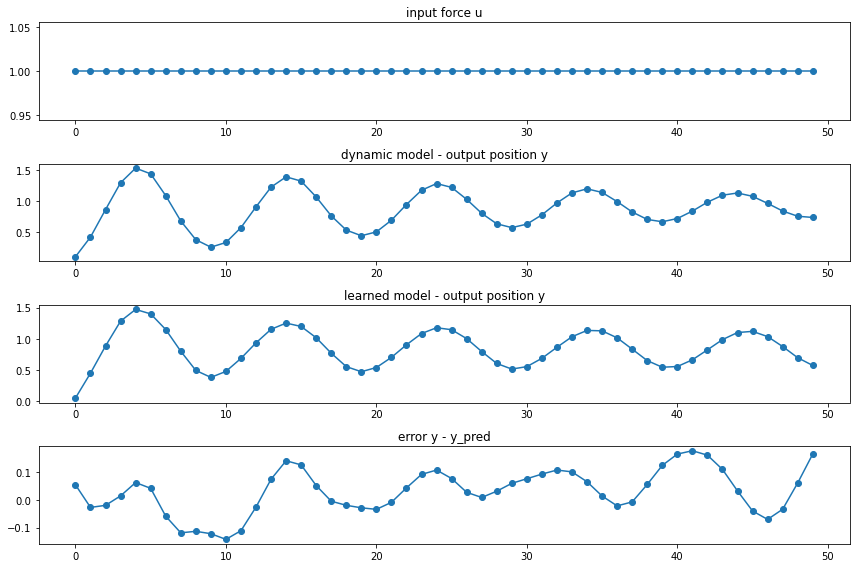

In [39]:
# simulate dynamic system
u, y = generate_dynamic_system_time_series(nl_dynsys, 
                                           n_timesteps=50,
                                           mode='unit_step')
# prediction
y_pred = model.predict(u[np.newaxis,...,np.newaxis])

plot_timeseries([u, y, y_pred[0,:,0], y-y_pred[0,:,0]], 
                ['input force u', 
                 'dynamic model - output position y', 
                 'learned model - output position y',
                 'error y - y_pred'])

## Example: non-linear dynamic system identification with LSTM

Instead of using a RNN cell with the same structure as our dynamic system, we can also try using LSTM cells. We will use the same trainingset as in the previous section, but will use a new model based on LSTM cells.

In [40]:
hidden_state_dim = 10

model_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(hidden_state_dim, 
                         input_shape=[None, input_dim],
                         activation='linear',
                         return_sequences=True,
                         use_bias=False),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Dense(output_dim, 
                              activation='linear',
                              use_bias=False)
    )    
])

optimizer = tf.keras.optimizers.Adam(lr=0.01)
#optimizer = tf.keras.optimizers.SGD(lr=0.01)
model_lstm.compile(loss="mse", optimizer=optimizer, metrics=["mse"])

In [41]:
# train model
history = model_lstm.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)

Train on 5000 samples, validate on 100 samples
Epoch 1/20
5000/5000 - 2s - loss: 0.0625 - mse: 0.0625 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 2/20
5000/5000 - 1s - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0275 - val_mse: 0.0275
Epoch 3/20
5000/5000 - 1s - loss: 0.0169 - mse: 0.0169 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4/20
5000/5000 - 1s - loss: 0.0030 - mse: 0.0030 - val_loss: 9.1600e-04 - val_mse: 9.1600e-04
Epoch 5/20
5000/5000 - 1s - loss: 5.3938e-04 - mse: 5.3938e-04 - val_loss: 3.1688e-04 - val_mse: 3.1688e-04
Epoch 6/20
5000/5000 - 1s - loss: 2.3744e-04 - mse: 2.3744e-04 - val_loss: 1.8567e-04 - val_mse: 1.8567e-04
Epoch 7/20
5000/5000 - 1s - loss: 1.5855e-04 - mse: 1.5855e-04 - val_loss: 1.3279e-04 - val_mse: 1.3279e-04
Epoch 8/20
5000/5000 - 1s - loss: 1.1588e-04 - mse: 1.1588e-04 - val_loss: 9.7711e-05 - val_mse: 9.7711e-05
Epoch 9/20
5000/5000 - 1s - loss: 9.1467e-05 - mse: 9.1467e-05 - val_loss: 7.6390e-05 - val_mse: 7.6390e-05
Epoch 10/20
5000/5000 - 1s - loss: 7.

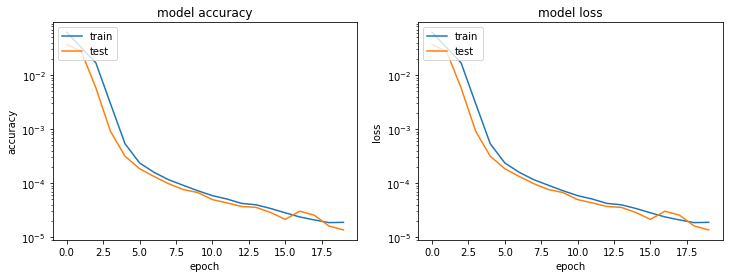

In [42]:
plot_history(history)

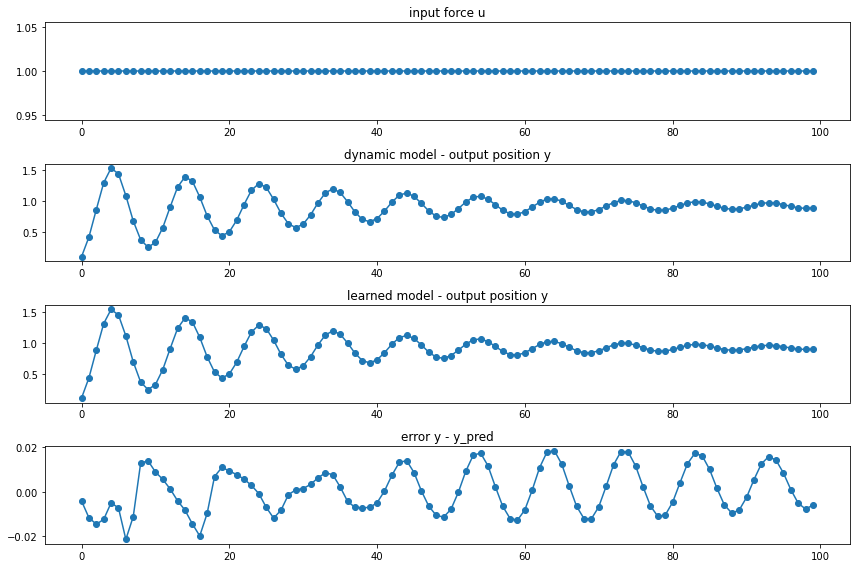

In [43]:
# simulate dynamic system
u, y = generate_dynamic_system_time_series(nl_dynsys, 
                                           n_timesteps=100,
                                           mode='unit_step')
# prediction
y_pred = model_lstm.predict(u[np.newaxis,...,np.newaxis])

plot_timeseries([u, y, y_pred[0,:,0], y-y_pred[0,:,0]], 
                ['input force u', 
                 'dynamic model - output position y', 
                 'learned model - output position y',
                 'error y - y_pred'])

If training went well, the performance of the model is good. LSTMs are more effective with learning than SimpleRNN cells. This can be seen from the results above.

# Stateful

So far we have trained RNN models there were **stateless**. A stateless RNN resets its internal state to zero at the end of a time series input. This is not always desired. When we want to use a RNN as a real-time filter it needs to remember its state at the end of processing every input sequence.

Training a **stateful** RNN can be done in two ways:

- copy the weights of a **stateless** trained RNN into a **stateful** RNN with the same network topology.
- train a **stateless** RNN from scratch and take care that the samples from the training batch follow up upon each other.

In the example below we will show how to use the first method. For more information on stateful RNNs see  https://fairyonice.github.io/Stateful-LSTM-model-training-in-Keras.html.

In [44]:
state_size = 2
hidden_units = 11

model_stateful  = tf.keras.models.Sequential([
            tf.keras.layers.RNN(
                MLPRNN(state_size=state_size,
                       hidden_units=hidden_units, 
                       activation="tanh",
                       input_shape=[None, input_dim]),
                return_sequences=True,
                stateful=True,
                batch_input_shape=[1, None, input_dim]),
    tf.keras.layers.TimeDistributed(
        tf.keras.layers.Dense(output_dim, activation='linear')
    )    
])

#optimizer = tf.keras.optimizers.Adam(lr=0.001)
optimizer = tf.keras.optimizers.SGD(lr=0.01)
model_stateful.compile(loss="mse", optimizer=optimizer, metrics=["mse"])


#model_stateful.build()
#model_stateful.summary()

In [45]:
# train model
history = model_stateful.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=2)

Train on 5000 samples, validate on 100 samples
Epoch 1/20
5000/5000 - 30s - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 2/20
5000/5000 - 29s - loss: 0.0352 - mse: 0.0352 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 3/20
5000/5000 - 29s - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0369 - val_mse: 0.0369
Epoch 4/20
5000/5000 - 27s - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 5/20
5000/5000 - 29s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0368 - val_mse: 0.0368
Epoch 6/20
5000/5000 - 28s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 7/20
5000/5000 - 28s - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 8/20
5000/5000 - 28s - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 9/20
5000/5000 - 28s - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 10/20
5000/5000 - 27s - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 11/20
5000/5000 

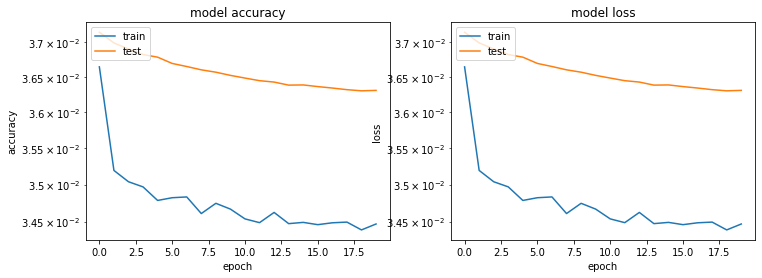

In [46]:
plot_history(history)

In [47]:
# copy weights from stateless to stateful RNN
model_stateful.layers[0].set_weights(model.layers[0].get_weights())
model_stateful.layers[1].set_weights(model.layers[1].get_weights())

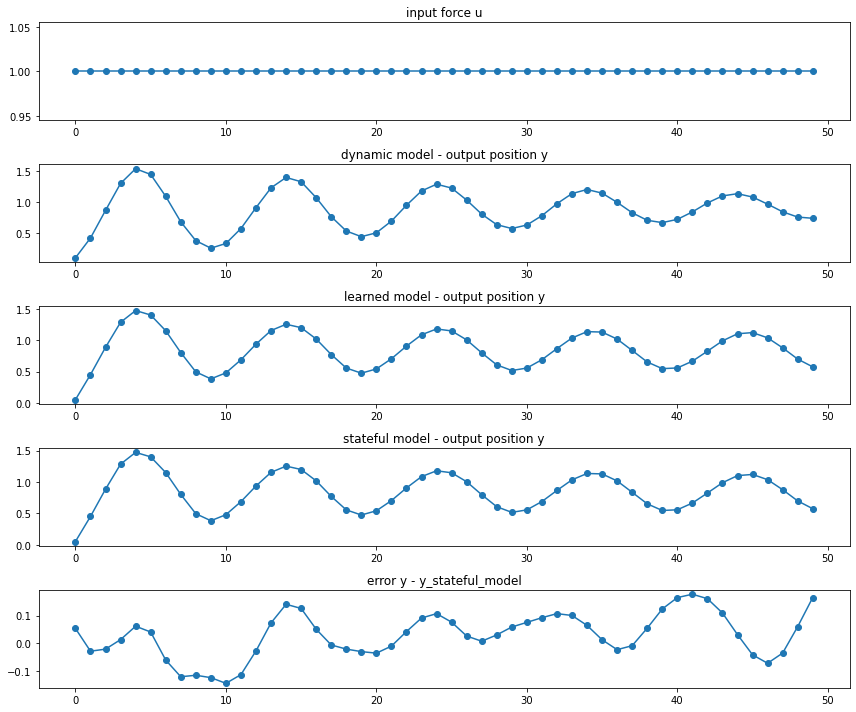

In [48]:
# simulate dynamic system
u, y = generate_dynamic_system_time_series(nl_dynsys, 
                                           n_timesteps=50,
                                           mode='unit_step')
# prediction
y_pred = model.predict(u[np.newaxis,...,np.newaxis])

# stateful prediction
# create placeholders for input and prediction
X = np.zeros(shape=(1,1,1))
y_pred_stateful = np.zeros(len(u))
# reset internal state before simulation loop
model_stateful.reset_states()
# state simulation loop with stateful model
for t in range(len(u)):
    X[0,0,0] = u[t]
    y_pred_stateful[t] = model_stateful.predict(X)[0,0,0]


plot_timeseries([u, y, y_pred[0,:,0], y_pred_stateful, y-y_pred[0,:,0]], 
                ['input force u', 
                 'dynamic model - output position y', 
                 'learned model - output position y',
                 'stateful model - output position y',
                 'error y - y_stateful_model'
                ])

